In [1]:
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 398 kB 7.3 MB/s 
  Created wheel for control: filename=control-0.9.2-py2.py3-none-any.whl size=403205 sha256=f059c6344ab6ee22e1c76783eafeae51cafb8c24b7823dab3ad6f26d2c422758
  Stored in directory: /root/.cache/pip/wheels/48/ef/c2/929bb5c59a1328df00a0561d0e68cd7c8537f33f5ce0ce741b
Successfully built control


In [2]:
import numpy as np
from matplotlib import pyplot as plt 
import control

In [ ]:
m_phase=0

signal=[]

f=500
fs=44100

phaseInc = 2*np.pi*f/fs

for i in range(256):
    signal.append(np.sin(m_phase))
    m_phase = m_phase + phaseInc


In [ ]:
120/np.pi

38.197186342054884

In [ ]:
ti = np.linspace(0, 120, 100000)

s = []
freq = 0.1
i = 0
for t in ti:
    

    if np.sin(2*np.pi*freq*t) > -0.0005 and np.sin(2*np.pi*freq*t) < 0:
        if i == 1:
          freq += 0.1
          i = 0
        else:
          i += 1

    s.append(np.sin(2*np.pi*freq*t))

freq

1.0999999999999999

In [ ]:
T = [1/(2*np.pi*(i/10)) for i in range(1, 11)]
T = np.asarray(T)
ini = 0
time = []
for tt in T:
    time.append(np.linspace(ini, ini + tt, 1000))
    ini += tt

time = np.asarray(time)
t1 = time[0]

In [ ]:
for i in range(1, 10):
    t1 = np.vstack((t1,time[i]))

In [ ]:
t1.shape

(10, 1000)

In [ ]:
T = [1/(2*np.pi*(i/10)) for i in range(1, 11)]
T = np.asarray(T)

time = np.linspace(0, T.sum(), 10000)

freq = []
i = 0
temp_total = 0
for t in time:

    if t > temp_total + T[i]:
        temp_total += T[i]
        i += 1

    freq.append(i/10)

s = []
for t in range(len(time)):
    s.append(np.sin(2*np.pi*freq[t]*time[t]))

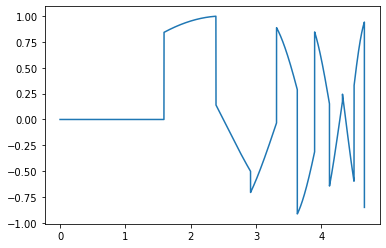

In [ ]:
plt.plot(time, s)

In [ ]:
s = np.sin(2*np.pi*freq)

plt.plot(time, s)

TypeError: ignored

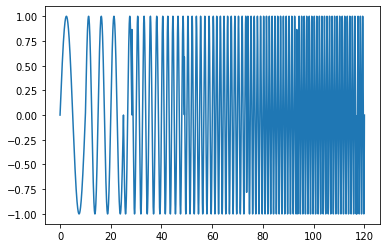

In [ ]:
plt.plot(ti, s)

In [ ]:
freq

0.2

In [ ]:
for i in range(8*np.pi):
    if 8*np.pi % np.pi == 0:
      print(i)


TypeError: ignored

In [ ]:
w = [f for i in range]

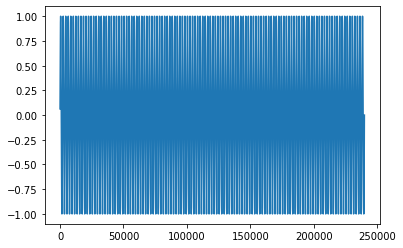

In [ ]:
tempo = 120
dt    = 0.0005

time = np.arange(0, tempo, dt) 
freq = np.linspace(0.01, tempo, len(time))

s = np.sin(2*np.pi*freq)

plt.plot(s)

In [ ]:
def stepResponse(R, C, tempo):

    dt = 0.0005

    # dx = Ax + Bu
    # A = -1/(R*C)   and   B = 1/(RC) ==============

    A, B = -1/(R*C), 1/(R*C)
    time = np.arange(0, tempo, dt) 
    ts   = len(time)

    # Initializing Variables =======================

    u = np.ones(ts)
    r = time
    x = np.zeros(ts)

    s = np.sin(2*np.pi*(time/50)*time)
    
    # Step Response ================================

    u[0] = 0

    for i in range(ts-1):
        x[i+1] = x[i] + dt*(A*x[i]+B*s[i])   

    return x, time, s



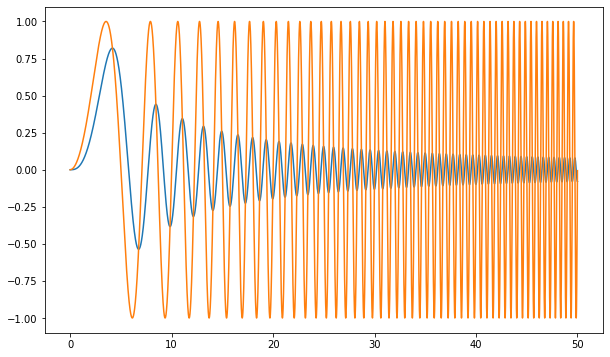

In [ ]:
plt.figure(figsize=(10,6))
y, time, s = stepResponse(1e6, 1e-6, 50)
plt.plot(time, y, label=f'{1 : .2f} MΩ')
plt.plot(time, s, label=f'{1 : .2f} MΩ')

plt.show()

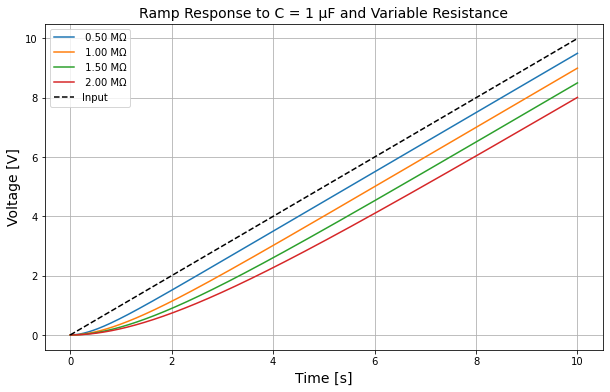

In [ ]:
R = [ 0.5, 1.0, 1.50, 2.0]

plt.figure(figsize=(10,6))

for i in range(len(R)):
    y, time = stepResponse(R[i]*1e6, 1e-6, 10)

    plt.plot(time, y, label=f'{R[i] : .2f} MΩ')

plt.plot(time, time, 'k--', label="Input")

plt.legend()
plt.grid(True)
plt.title('Ramp Response to C = 1 µF and Variable Resistance', fontsize=14)
plt.ylabel('Voltage [V]', fontsize=14)
plt.xlabel('Time [s]', fontsize=14)

plt.show()

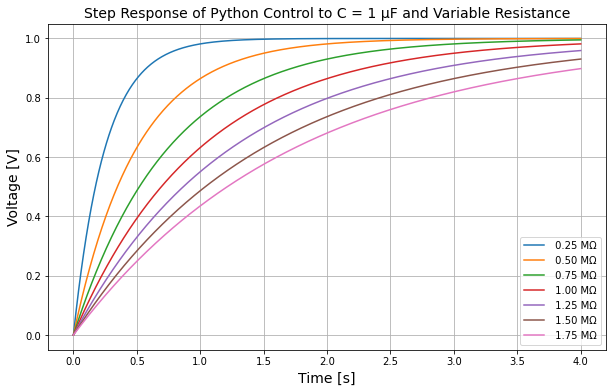

In [ ]:
R = [0.25, 0.5, 0.75, 1.0, 1.25, 1.50, 1.75]

plt.figure(figsize=(10,6))

for i in range(len(R)):
    G = control.TransferFunction((1), (R[i]*1e6*1e-6, 1))

    response = control.step_response(G, T=np.linspace(0.0, 4.0, num=1000))

    plt.plot(response.time, response.outputs, label=f'{R[i] : .2f} MΩ')

plt.legend()
plt.grid(True)
plt.title('Step Response of Python Control to C = 1 µF and Variable Resistance', fontsize=14)
plt.ylabel('Voltage [V]', fontsize=14)
plt.xlabel('Time [s]', fontsize=14)

plt.show()

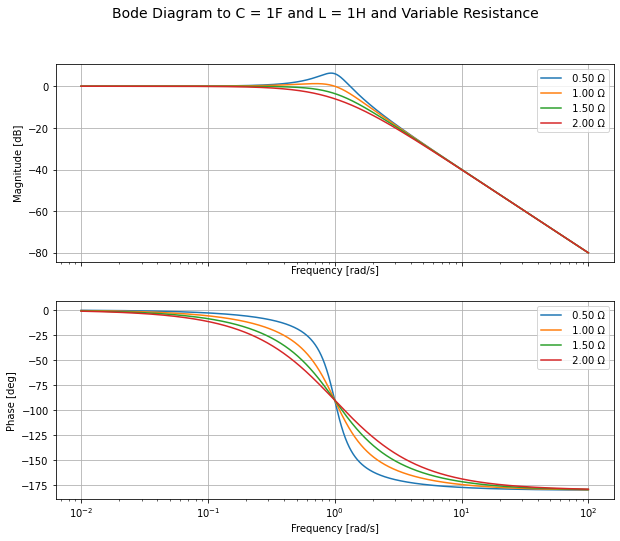

In [ ]:
R = [0.5, 1.0, 1.50, 2.0]

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10,8))
fig.suptitle('Bode Diagram to C = 1F and L = 1H and Variable Resistance', fontsize=14)

for i in range(len(R)):

    sys = signal.TransferFunction([1], [1, R[i], 1])
    w, mag, phase = signal.bode(sys, w=np.arange(0.01, 100, 0.001))
    

    ax1.semilogx(w, mag, label=f'{R[i] : .2f} Ω')
    ax1.grid(True)
    ax1.legend()

    ax2.semilogx(w, phase, label=f'{R[i] : .2f} Ω')
    ax2.grid(True)
    ax2.legend()

ax1.set(xlabel='Frequency [rad/s]', ylabel='Magnitude [dB]')
ax2.set(xlabel='Frequency [rad/s]', ylabel='Phase [deg]')


plt.show()

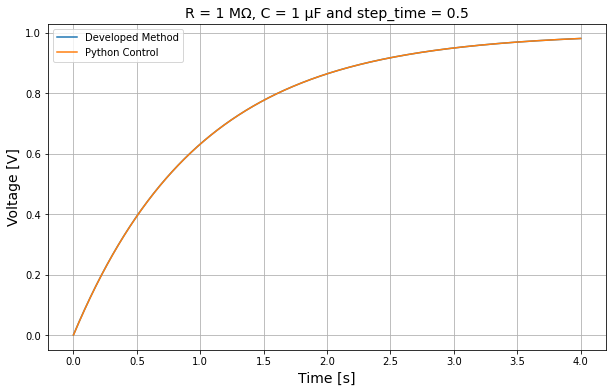

In [ ]:
plt.figure(figsize=(10,6))

G = control.TransferFunction((1), (1e6*1e-6, 1))
response = control.step_response(G, T=np.linspace(0.0, 4.0, num=1000))
plt.plot(response.time, response.outputs, label=f'Developed Method')

y, time = stepResponse(1e6, 1e-6, 4)
plt.plot(time, y, label=f'Python Control')

plt.legend()
plt.grid(True)
plt.title('R = 1 MΩ, C = 1 µF and step_time = 0.5', fontsize=14)
plt.ylabel('Voltage [V]', fontsize=14)
plt.xlabel('Time [s]', fontsize=14)

plt.show()

In [ ]:
t = np.arange(0, 5, 1e-4) 
delta_t = t[1]-t[0]

delta_t

0.0001

In [ ]:
plt.plot(t, np.asarray(s))

In [ ]:
RC = 1e6
A = -1/RC
B = 1/RC
# vetor de tempo
t = np.arange(0, 5, 1e-4) 

u = np.ones(len(t))
u[0] = 0 # degrau unitário

x = [0 if i == 0 else x[i-1] + delta_t*(A*x[i-1]+B*u[i-1]) for i in range(len(t))]
for i in range(len(t)):

  if i == 0:
    x.append(0)
  else:
    x.append(x[i-1] + delta_t*(A*x[i-1]+B*u[i-1]))

np.asarray(x)

array([0.00000000e+00, 0.00000000e+00, 1.00000000e-05, ...,
       3.93446595e-01, 3.93452660e-01, 3.93458726e-01])

In [ ]:
RC = 10
A = -1/RC
B = 1/RC
# vetor de tempo
t = np.arange(0, 5, 1e-4) 

u = np.ones(len(t))
u[0] = 0 # degrau unitário

x = np.zeros(len(t))
for step_i in range(len(t)-1):
 x[step_i+1] = x[step_i] + delta_t*(A*x[step_i]+B*u[step_i])

x

array([0.00000000e+00, 0.00000000e+00, 1.00000000e-05, ...,
       3.93446595e-01, 3.93452660e-01, 3.93458726e-01])

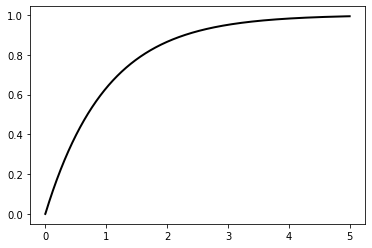

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Matrizes dos espaços de estado dx = Ax + Bu
RC = 1e6 * 1e-6
A = -1/RC
B = 1/RC
# vetor de tempo
t = np.arange(0, 5, 5e-4) 
delta_t = t[1]-t[0]
 
# vetor de entrada
u = np.ones(len(t))
u[0] = 0 # degrau unitário
 
# Método de Euler
x = np.zeros(len(t))
for step_i in range(len(t)-1):
 x[step_i+1] = x[step_i] + delta_t*(A*x[step_i]+B*u[step_i])
 
# Plotando gráfico
plt.plot(t, x, color='black', lw=2)


In [ ]:
mm = np.arange(0.01, 100, 0.001)

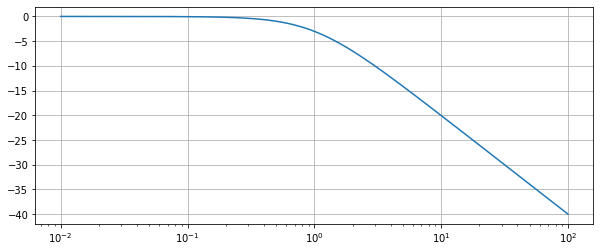

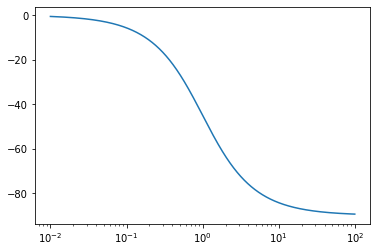

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt

sys = signal.TransferFunction([1], [1, 1])
w, mag, phase = signal.bode(sys, w=mm)

plt.figure(figsize=(10,4))
plt.grid(True)
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

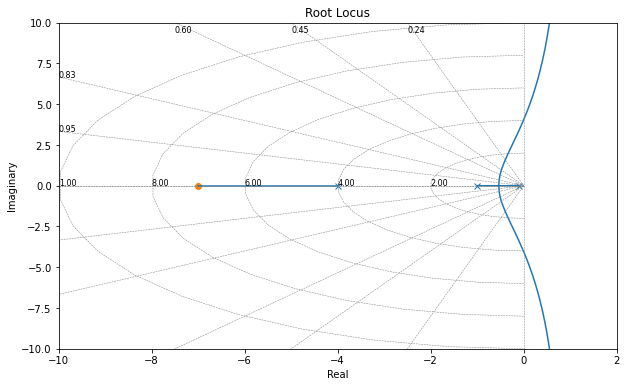

In [ ]:
plt.figure(figsize=(10,6))

G = control.TransferFunction((1, 7), (1, 5.1, 4.5, 0.4))

rlist, klist = control.rlocus(G, kvect=np.linspace(100.0, -100.0, num=1000), xlim=(-10, 2), ylim=(-10, 10))


plt.show()

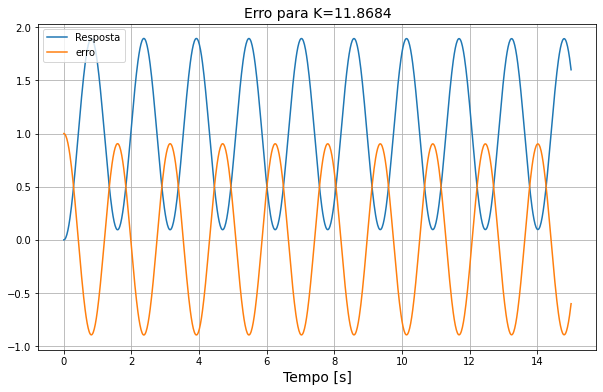

In [ ]:
k = 11.86
G = control.TransferFunction((k*1, k*7), (1, 5.1, 4.5 + k, 0.4 + 7*k))
plt.figure(figsize=(10,6))
response = control.step_response(G, T=np.linspace(0.0, 15.0, num=1000))
plt.plot(response.time, response.outputs, label='Resposta')
plt.plot(response.time, 1-response.outputs, label='erro')
plt.grid(True)
plt.title('Erro para K=11.8684', fontsize=14)
plt.xlabel("Tempo [s]", fontsize=14)
plt.legend()
plt.show()

In [ ]:
# %% Creating model:
num = np.array([1, 7])
den = np.array([1, 5.1, 4.5, 0.4])
H = control.tf(num, den)

# %% Defining signals:
t0 = 0
t1 = 20
dt = 0.01
nt = int(t1/dt) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)
u = 1*np.ones(nt)

print(u)

[1. 1. 1. ... 1. 1. 1.]


In [ ]:
# %% Simulation:
(t, y) = control.forced_response(H, t, u, X0=0)

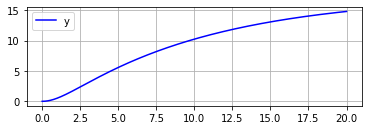

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(t, y, 'blue')
#plt.xlabel('t [s]')
plt.grid()
plt.legend(labels=('y',))
plt.show()

In [ ]:
# %% Import:
import numpy as np
import control
import matplotlib.pyplot as plt

# %% Creating model:
num = np.array([1, 7])
den = np.array([1, 5.1, 4.5, 0.4])
H = control.tf(num, den)

# %% Defining signals:
t0 = 0
t1 = 20
dt = 0.01
nt = int(t1/dt) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)
u = 2*np.ones(nt)

print(u)

# %% Simulation:
(t, y, x) = control.forced_response(H, t, u, X0=0)

# %% Plotting:
plt.close('all')
fig_width_cm = 24
fig_height_cm = 18
plt.figure(1, figsize=(fig_width_cm/2.54, fig_height_cm/2.54))

plt.subplot(2, 1, 1)
plt.plot(t, y, 'blue')
#plt.xlabel('t [s]')
plt.grid()
plt.legend(labels=('y',))

plt.subplot(2, 1, 2)
plt.plot(t, u, 'green')
plt.xlabel('t [s]')
plt.grid()
plt.legend(labels=('u',))

plt.savefig('sim_tf.pdf')

[2. 2. 2. ... 2. 2. 2.]


ValueError: ignored

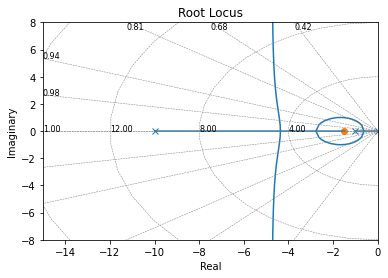

In [ ]:
G = control.TransferFunction((1, 1.5), (1, 11, 10, 0))

rlist, klist = control.rlocus(G, kvect=np.linspace(100.0, -100.0, num=1000), xlim=(-15, 0), ylim=(-8, 8))


plt.show()

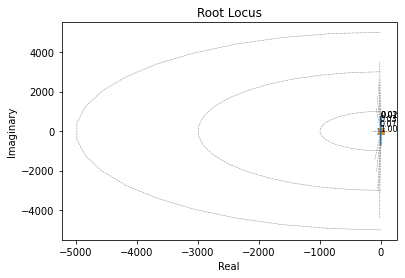

In [ ]:
import numpy as np
from matplotlib import pyplot as plt 
import control

G = control.TransferFunction((1, 1.5), (1, 11, 10, 0))

rlist, klist = control.rlocus(G, kvect=np.linspace(100.0, -100.0, num=1000))

plt.show()

In [ ]:
from scipy import signal

In [ ]:
k = 1
lti  = signal.lti([k*1, k*7], [1, 5.1, 4.5 + k, 0.4 + 7*k])
time, y = signal.step(lti)

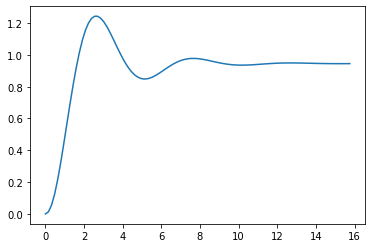

In [ ]:
plt.plot(time, y)

In [ ]:
import numpy as np

def stepResponse(R, C, L, tempo):

    dt = 0.00001

    # dx2 = Ax1 + Bx2 + Du
    # A = -1/(R*C)   and   B = 1/(RC) ==============

    A, B, D = -1/(L*C), -R/L, 1/(L*C)
    time = np.arange(0, tempo, dt) 
    ts   = len(time)

    # Initializing Variables =======================

    u  = np.ones(ts)
    r  = time
    x1 = np.zeros(ts)
    x2 = np.zeros(ts)
    
    # Step Response ================================

    u[0] = 0

    for i in range(ts-1):
        x2[i+1] = x2[i] + dt*(A*x1[i] + B*x2[i] + D*u[i])   
        x1[i+1] = x1[i] + dt*x2[i]   

    return x1, time



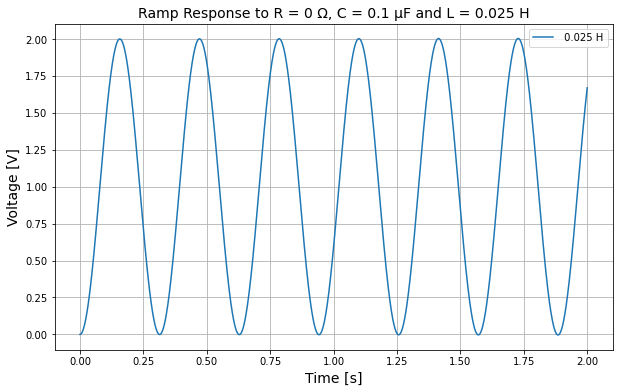

In [ ]:
L = [0.25]

plt.figure(figsize=(10,6))

for i in range(len(L)):
    y, time = stepResponse(0, 0.1, L[i]*0.1, 2)

    plt.plot(time, y, label=f'{L[i]*0.1 : .3f} H')


plt.legend()
plt.grid(True)
plt.title('Ramp Response to R = 0 Ω, C = 0.1 µF and L = 0.025 H', fontsize=14)
plt.ylabel('Voltage [V]', fontsize=14)
plt.xlabel('Time [s]', fontsize=14)

plt.show()

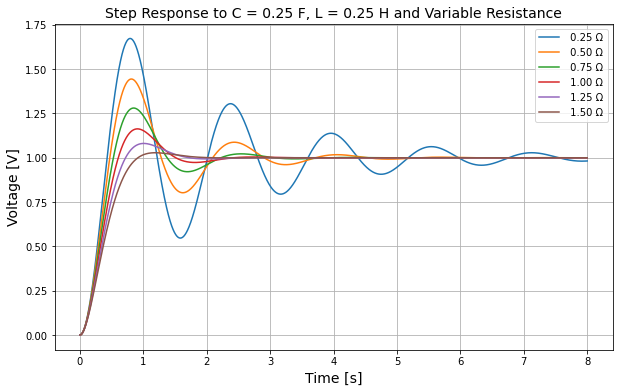

In [ ]:
R = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5]

plt.figure(figsize=(10,6))

for i in range(len(R)):
    y, time = stepResponse(R[i], 0.25, 0.25, 8)

    plt.plot(time, y, label=f'{R[i] : .2f} Ω')


plt.legend()
plt.grid(True)
plt.title('Step Response to C = 0.25 F, L = 0.25 H and Variable Resistance', fontsize=14)
plt.ylabel('Voltage [V]', fontsize=14)
plt.xlabel('Time [s]', fontsize=14)

plt.show()

In [ ]:
y, time = stepResponse(1, C[i]*0.1, 0.1, 1.5)
plt.plot(time, y, label=f'{C[i]*0.1 : .3f} F')

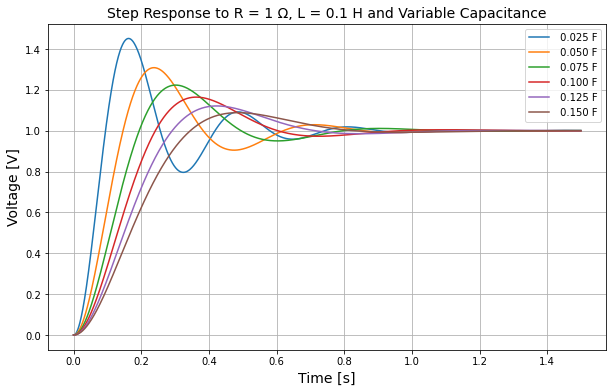

In [ ]:
C = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5]

plt.figure(figsize=(10,6))

for i in range(len(R)):
    y, time = stepResponse(1, C[i]*0.1, 0.1, 1.5)

    plt.plot(time, y, label=f'{C[i]*0.1 : .3f} F')


plt.legend()
plt.grid(True)
plt.title('Step Response to R = 1 Ω, L = 0.1 H and Variable Capacitance', fontsize=14)
plt.ylabel('Voltage [V]', fontsize=14)
plt.xlabel('Time [s]', fontsize=14)

plt.show()

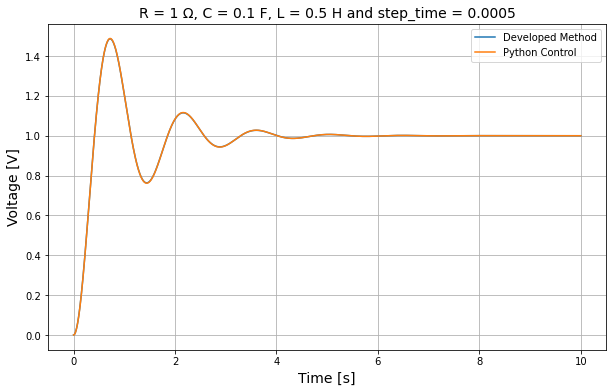

In [ ]:
plt.figure(figsize=(10,6))

G = control.TransferFunction((1/(0.1*0.5)), (1, 1/0.5, 1/(0.1*0.5)))
response = control.step_response(G, T=np.linspace(0.0, 10.0, num=1000))
plt.plot(response.time, response.outputs, label=f'Developed Method')

y, time = stepResponse(1, 0.1, 0.5, 10)
plt.plot(time, y, label=f'Python Control')

plt.legend()
plt.grid(True)
plt.title('R = 1 Ω, C = 0.1 F, L = 0.5 H and step_time = 0.0005', fontsize=14)
plt.ylabel('Voltage [V]', fontsize=14)
plt.xlabel('Time [s]', fontsize=14)

plt.show()